# 6.4 Machine Learning - Supervised 

## This script contains:

__1. Importing libraries and data__

__2. Data Cleaning__

__3. Explore data visually__

__4. State hypothesis in markdown cell__

__5. Reshape variables into NumPy arrays__

__6. Split data into two sets: training and test__

__7. Run a linear regression on the data__

__8. Create a plot that shows the linear regression on the *test* set__

__9. Interpret results__

__10. Check the model performance statistics (MSE and R2)__

__11. Compare the predicted y values with the actual y values in a dataframe__

__12. Thoughts and Observations__

### 1. Importing libraries and data

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Victoria\Documents\veallen20\OneDrive\Desktop\Data Analytics Career Foundry\6.0 Advanced Analytics and Dashboard Design\Bambino 2.0'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Cleaned Data', 'baseball_dv.csv'))

### 2. Data Cleaning

In [5]:
df.columns

Index(['rank', 'combined_key', 'name', 'year', 'city', 'state', 'country',
       'bats', 'throws', 'team_signed', 'team_locale', 'team_locale_county',
       'position', 'contract_start', 'contract_end', 'contract_length',
       'total_salary', 'age', 'team_played', 'league', 'games', 'war',
       'actual_salary', 'league_r', 'bats_r', 'throws_r', 'team_sr', 'team_pr',
       'position_r'],
      dtype='object')

In [6]:
df.head(10)

,rank,combined_key,name,year,city,state,country,bats,throws,team_signed,...,league,games,war,actual_salary,league_r,bats_r,throws_r,team_sr,team_pr,position_r
0,1,"Mike Trout, 2019",Mike Trout,2019,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,AL,134,7.9,17666667.0,0,0,0,12,12,8
1,1,"Mike Trout, 2020",Mike Trout,2020,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,AL,53,1.8,37666666.0,0,0,0,12,12,8
2,1,"Mike Trout, 2021",Mike Trout,2021,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,AL,36,1.8,37116667.0,0,0,0,12,12,8
3,1,"Mike Trout, 2022",Mike Trout,2022,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,AL,119,6.3,37116666.0,0,0,0,12,12,8
4,1,"Mike Trout, 2023",Mike Trout,2023,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,AL,81,3.0,37116667.0,0,0,0,12,12,8
5,2,"Mookie Betts, 2021",Mookie Betts,2021,"Nashville, Tennessee",Tennessee,United States,R,R,LAD,...,NL,122,4.0,22916667.0,1,0,0,13,13,6
6,2,"Mookie Betts, 2022",Mookie Betts,2022,"Nashville, Tennessee",Tennessee,United States,R,R,LAD,...,NL,142,6.4,22916666.0,1,0,0,13,13,6
7,2,"Mookie Betts, 2023",Mookie Betts,2023,"Nashville, Tennessee",Tennessee,United States,R,R,LAD,...,NL,111,5.7,25416667.0,1,0,0,13,13,6
8,3,"Aaron Judge, 2023",Aaron Judge,2023,"Linden, New Jersey",California,United States,R,R,NYY,...,AL,65,3.0,40000000.0,0,0,0,18,18,8
9,4,"Manny Machado, 2023",Manny Machado,2023,"Hialeah, Florida",Florida,United States,R,R,SDP,...,NL,103,2.4,17090909.0,1,0,0,22,22,5


In [7]:
df.shape

(1481, 29)

__Missing values__

In [8]:
#Check for missing values

df.isnull().sum()

rank                    0
combined_key            0
name                    0
year                    0
city                    0
state                 494
country                 0
bats                    0
throws                  0
team_signed             0
team_locale             0
team_locale_county      0
position                0
contract_start          0
contract_end            0
contract_length         0
total_salary            0
age                     0
team_played             0
league                  0
games                   0
war                     1
actual_salary          84
league_r                0
bats_r                  0
throws_r                0
team_sr                 0
team_pr                 0
position_r              0
dtype: int64

In [9]:
# Remove missing war value from dataset
df_2 = df[df['war'].isnull() == False]

In [10]:
# confirm missing war value has been removed
df_2['war'].isnull().sum()

0

I'm going to create two new data sets, one for international born players, df_i, and one for US born players, df_d. df_2 will have the information on all players. I'm also going to impute a value of '0' for missing 'actual_salary' values. After some research, I found that the missing values represent no pay, or a salary of 0.

In [11]:
# Imputing '0' for 'actual_salary' missing values, I'll make a new df_3.
df_3 = df_2


In [12]:
#Impute missing 'actual_salary' values with 0
df_3['actual_salary'] = df_3['actual_salary'].replace(np.nan, 0)

C:\Users\Victoria\AppData\Local\Temp\ipykernel_948\622827322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['actual_salary'] = df_3['actual_salary'].replace(np.nan, 0)


In [13]:
#Confirm
df_3.isnull().sum()

rank                    0
combined_key            0
name                    0
year                    0
city                    0
state                 494
country                 0
bats                    0
throws                  0
team_signed             0
team_locale             0
team_locale_county      0
position                0
contract_start          0
contract_end            0
contract_length         0
total_salary            0
age                     0
team_played             0
league                  0
games                   0
war                     0
actual_salary           0
league_r                0
bats_r                  0
throws_r                0
team_sr                 0
team_pr                 0
position_r              0
dtype: int64

In [14]:
#Create df_i for international born players
df_i = df_3[df_3['state'].isnull() == True]

In [15]:
df_i.shape

(494, 29)

In [16]:
# Create df_d for domestic players
df_d = df_3[df_3['state'].isnull() == False]

In [17]:
df_d.shape

(986, 29)

Now I have three options for dataframes to use for regression:
1. df_3 = all players
2. df_i = international players
3. df_d = US born players

__Duplicates check__

In [18]:
#check df_3, all players. Logically, if this df has no duplicates, than df_d and df_i don't either
dups_1 = df_3.duplicated()

In [19]:
dups_1.shape #no dups

(1480,)

__Extreme value checks__

C:\Users\Victoria\AppData\Local\Temp\ipykernel_948\2012442133.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_3['war'], bins=25) # Shows extreme values


<Axes: xlabel='war', ylabel='Density'>

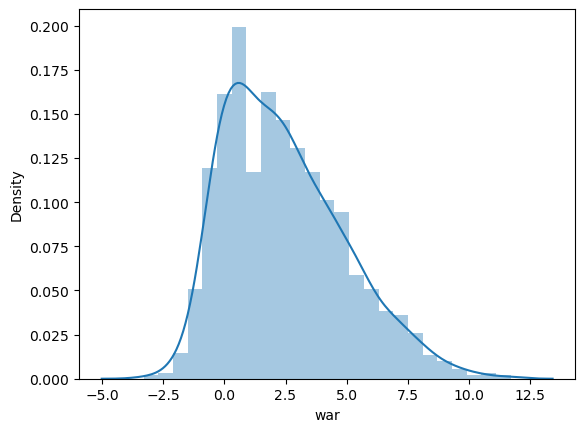

In [20]:
sns.distplot(df_3['war'], bins=25) # Shows extreme values

In [21]:
df_3['war'].describe()

count    1480.000000
mean        2.447500
std         2.455493
min        -3.300000
25%         0.600000
50%         2.100000
75%         4.000000
max        11.700000
Name: war, dtype: float64

In [22]:
print(df_3['war'].var())

6.0294460784313975


### 3. Explore data visually

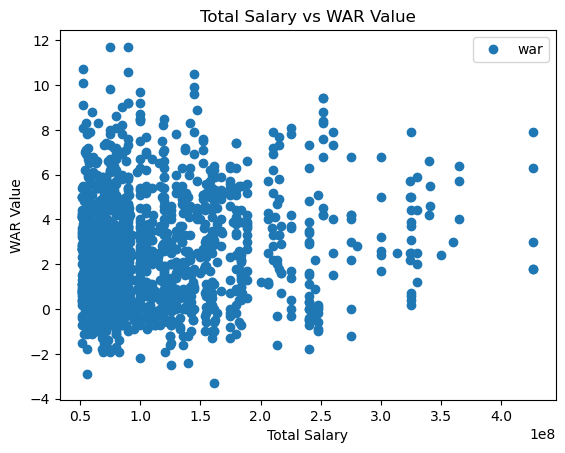

In [23]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_3.plot(x = 'total_salary', y='war',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Salary vs WAR Value')  
plt.xlabel('Total Salary')  
plt.ylabel('WAR Value')  
plt.show()

### 4. Hypothesis
__As total salary increases, the war value of a player increases as well.__

### 5. Reshape variables into NumPy arrays

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_3['total_salary'].values.reshape(-1,1)
y = df_3['war'].values.reshape(-1,1)

In [25]:
X

array([[426500000],
       [426500000],
       [426500000],
       ...,
       [ 52000000],
       [ 52000000],
       [ 52000000]], dtype=int64)

In [26]:
y

array([[7.9],
       [1.8],
       [1.8],
       ...,
       [3.5],
       [2.7],
       [0.8]])

### 6. Split the data into two sets: training and test

In [27]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 7. Run a linear regression on the data

In [28]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [29]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

### 8. Create a plot that shows the linear regression on the *test* set

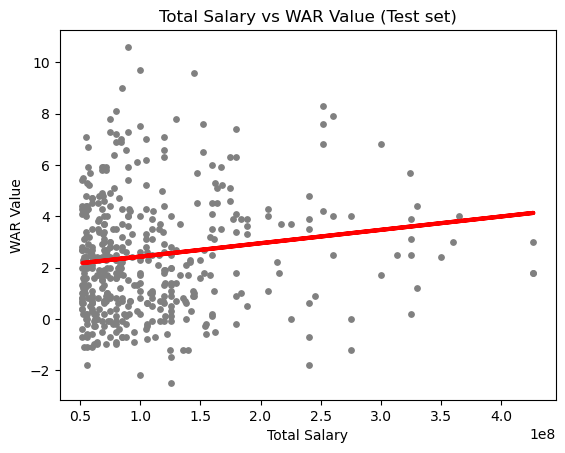

In [31]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Salary vs WAR Value (Test set)')
plot_test.xlabel('Total Salary')
plot_test.ylabel('WAR Value')
plot_test.show()

### 9. Interpretation of how well the line appears to fit the data
This line doesn't appear to fit the data well. A majority of the data points are clustered towards the left portion of the chart. However, upon visual inspection the line does appear to suport my hypothesis that as total salary increases, war increases as well. I suspect though that I will have a high MSE value and a low R2 score. But we'll see.

### 10. Check the model performance statistics (MSE and R2 score).

In [32]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [33]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.21745497e-09]]
Mean squared error:  5.181294368438801
R2 score:  0.00997676231548994


### 11. Compare the predicted y values with the actual y values in a dataframe

In [34]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.6,2.456061
1,3.7,2.268232
2,-0.5,2.398669
3,0.7,2.380408
4,-0.2,2.456061
5,1.4,2.560410
6,3.9,2.863022
7,2.4,3.729120
8,4.5,2.756064
9,3.7,2.346494


### 12. Thoughts and Observations
__Model performace statistics__
* __Slope: 5.21745497e-09__
    * The slope is positive, meaning that as one variable increases, the other does as well. This does allgin with my hypothesis.
* __MSE: 5.181294368438801__
    * The variance of the 'war' column is 6.0294460784313975. So I would say that the MSE value is reasonable. This value is the opposite of my inital assumption that the MSE value would be high.
* __R2: 0.00997676231548994__
    * The R2 score of my model is less than 1% out of 100. This is almost laughable and is absolutely not a good fit. The R2 value is as close to 0 as it can be (almost!) so this model does not do a good job of explaining what factors play into determining neither war values nor total salaries

__Predicted y values with actual y values__
There is a VERY noticeable difference between actual and predicted y values. They are not similar at all. Also, just from examining the first 30 values in the predicted values are all positive, this is unrealistic. I can't remove any values from the 'war' column either because I don't feel that I have any outlier values. This shows that the model is not explaining the relationship between these two variables well.

__Overall conclusion and hypothesis evaluation__
This model disproves my hypothesis, *As total salary increases, the war value of a player increases as well.* So, I'm left knowing that total salary of a player doesn't seem to impact their war value (at least from a *linear* regression model). So there must be some other factor that determines contract salaries OR this could imply that players are being overvalued compared to their actual performance... further investigation is definitely needed.

In [35]:
#Export cleaned df_3, df_d, df_i
df_3.to_csv(os.path.join(path, '02 Data', 'Cleaned Data', 'baseball_all.csv'))
df_d.to_csv(os.path.join(path, '02 Data', 'Cleaned Data', 'baseball_us.csv'))
df_i.to_csv(os.path.join(path, '02 Data', 'Cleaned Data', 'baseball_int.csv'))